In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

pd.set_option('future.no_silent_downcasting', True)


# Task 1 - Data processing

In [3]:
def plot_dataset(dataset, title=None):
    fig, ax = plt.subplots(figsize=(20,10))
    sns.heatmap(dataset.corr(), cmap="seismic", center=0).set_title(title)
    plt.show()

In [4]:
def check_correlation(data):
    correlation_matrix = data.corr().abs()
    strongly_correlated = (correlation_matrix > 0.8) & (correlation_matrix < 1.0)

    correlated_columns = []
    for col in strongly_correlated.columns:
        correlated_cols = strongly_correlated.index[strongly_correlated[col]].tolist()
        if correlated_cols:
            correlated_columns.append((col, correlated_cols))
    return correlated_columns

## Large datasets

### 1. Ionosphere - https://archive.ics.uci.edu/ml/datasets/ionosphere

In [6]:
ionosphere_data=pd.read_csv("data/ionosphere/ionosphere.data",header=None,index_col=None)
ionosphere_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Number of null values:
0
Column 12 is strongly correlated with columns: 14
Column 14 is strongly correlated with columns: 12


<ipython-input-3-bba15662908b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr().abs()
<ipython-input-2-29ab4f7e4b09>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), cmap="seismic", center=0).set_title(title)


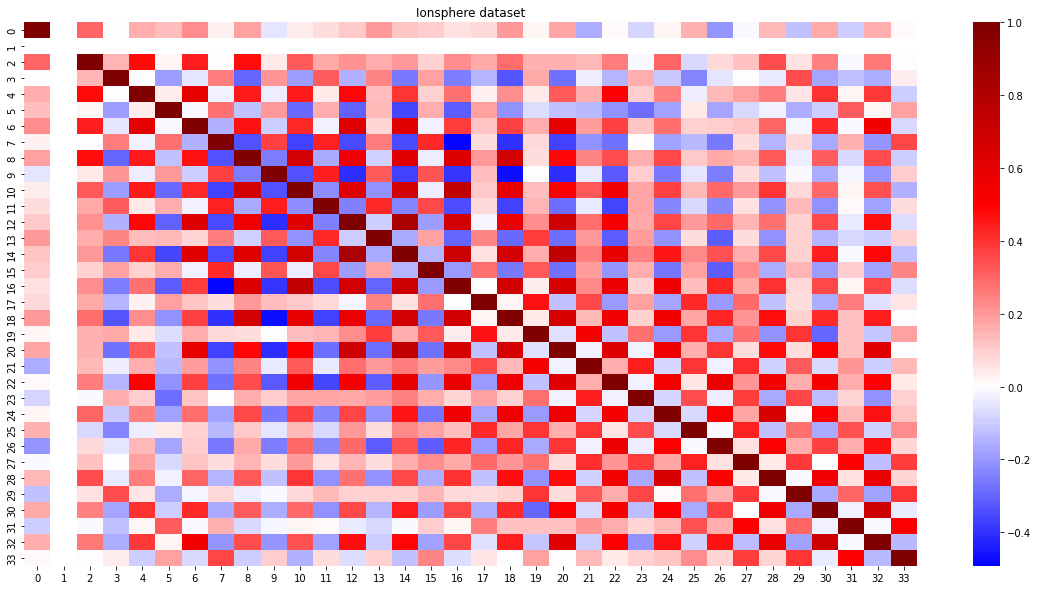

In [5]:
print("Number of null values:")
print(ionosphere_data.isnull().sum().sum()) 

correlated_columns = check_correlation(ionosphere_data)

for col, correlated_cols in correlated_columns:
    print(f"Column {col} is strongly correlated with columns: {', '.join(map(str, correlated_cols))}")
            
plot_dataset(ionosphere_data, title="Ionsphere dataset")

In [6]:
ionosphere_data = ionosphere_data.drop(14, axis=1)

### 2. Heart Attack Analysis & Prediciton Dataset - https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download

In [8]:
heart_data = pd.read_csv("data/HeartAttackAnalysis/heart.csv")
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Number of null values:
0


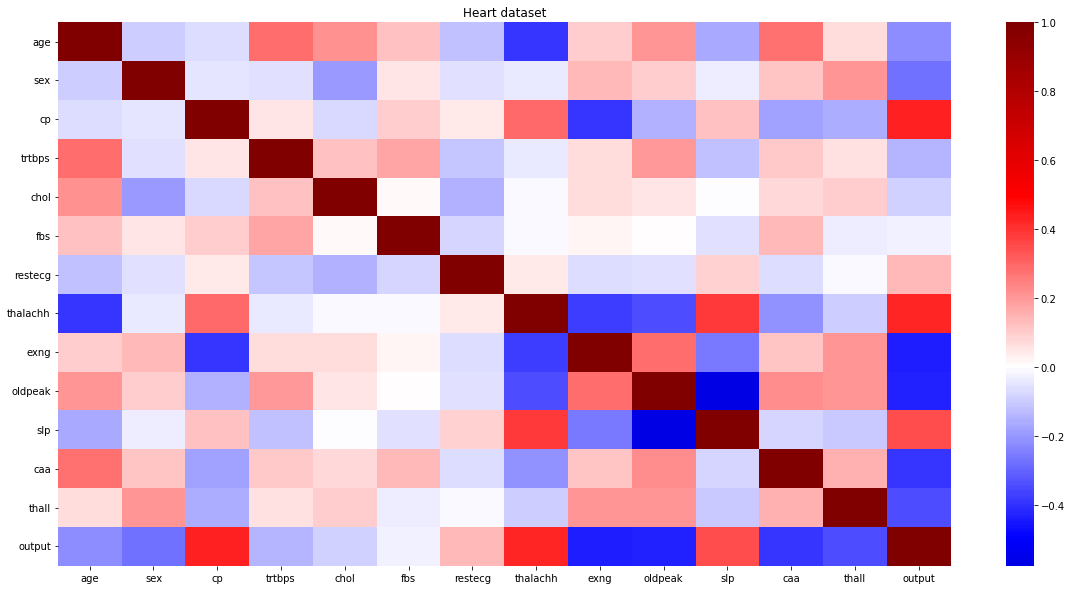

In [11]:
print("Number of null values:")
print(heart_data.isnull().sum().sum()) 

correlated_columns = check_correlation(heart_data)

for col, correlated_cols in correlated_columns:
    print(f"Column {col} is strongly correlated with columns: {', '.join(map(str, correlated_cols))}")
            
plot_dataset(heart_data, title="Heart dataset")

There are no missing values and strongly correlated variables.

### 3. Climate dataset - https://www.openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfClasses=%3D_2&id=1467

In [23]:
data = arff.loadarff("./data/Climate/climate.arff")
climate_df = pd.DataFrame(data[0])
climate_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,Class
0,1.0,1.0,502.0,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,b'1'
1,1.0,2.0,249.0,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,b'2'
2,1.0,3.0,202.0,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,b'2'
3,1.0,4.0,56.0,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,b'2'
4,1.0,5.0,278.0,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,b'2'


In [24]:
climate_df.replace({"Class": {b"1": 0, b"2": 1}}, inplace=True)
climate_df.drop(columns=["V1", "V2"], inplace=True)
climate_df.describe()

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,270.500000,0.500096,0.500027,0.500119,0.500001,0.499913,0.500059,0.500076,0.500044,0.500111,0.499984,0.500032,0.499933,0.499944,0.499945,0.500044,0.500020,0.500021
std,156.028843,0.288922,0.289067,0.288993,0.288827,0.288852,0.289010,0.288909,0.288860,0.288966,0.289127,0.289013,0.288822,0.288949,0.288923,0.288813,0.288936,0.289013
min,1.000000,0.001922,0.001181,0.001972,0.000858,0.000476,0.004590,0.000296,0.003231,0.002015,0.000419,0.001188,0.001312,0.002509,0.000732,0.000891,0.000219,0.000263
25%,135.750000,0.251597,0.251540,0.250159,0.250630,0.251325,0.253047,0.250402,0.252661,0.250758,0.251677,0.249669,0.249988,0.249586,0.249974,0.250412,0.252739,0.249723
50%,270.500000,0.499595,0.500104,0.500456,0.500903,0.499174,0.499070,0.500074,0.500295,0.500393,0.500322,0.500150,0.500626,0.499080,0.499959,0.500385,0.498955,0.499431
75%,405.250000,0.750011,0.749180,0.750348,0.748988,0.748166,0.750108,0.749091,0.748606,0.749447,0.749346,0.749164,0.749569,0.750012,0.747978,0.749256,0.748538,0.749792
max,540.000000,0.998815,0.998263,0.997673,0.998944,0.997142,0.998930,0.998506,0.997172,0.999536,0.999942,0.997718,0.997518,0.999795,0.999155,0.997265,0.999306,0.999655


Number of null values:
0
Percentage of missing values per variable:
V4       0.0
V5       0.0
V6       0.0
V7       0.0
V8       0.0
V9       0.0
V10      0.0
V11      0.0
V12      0.0
V13      0.0
V14      0.0
V15      0.0
V16      0.0
V17      0.0
V18      0.0
V19      0.0
V20      0.0
Class    0.0
dtype: float64


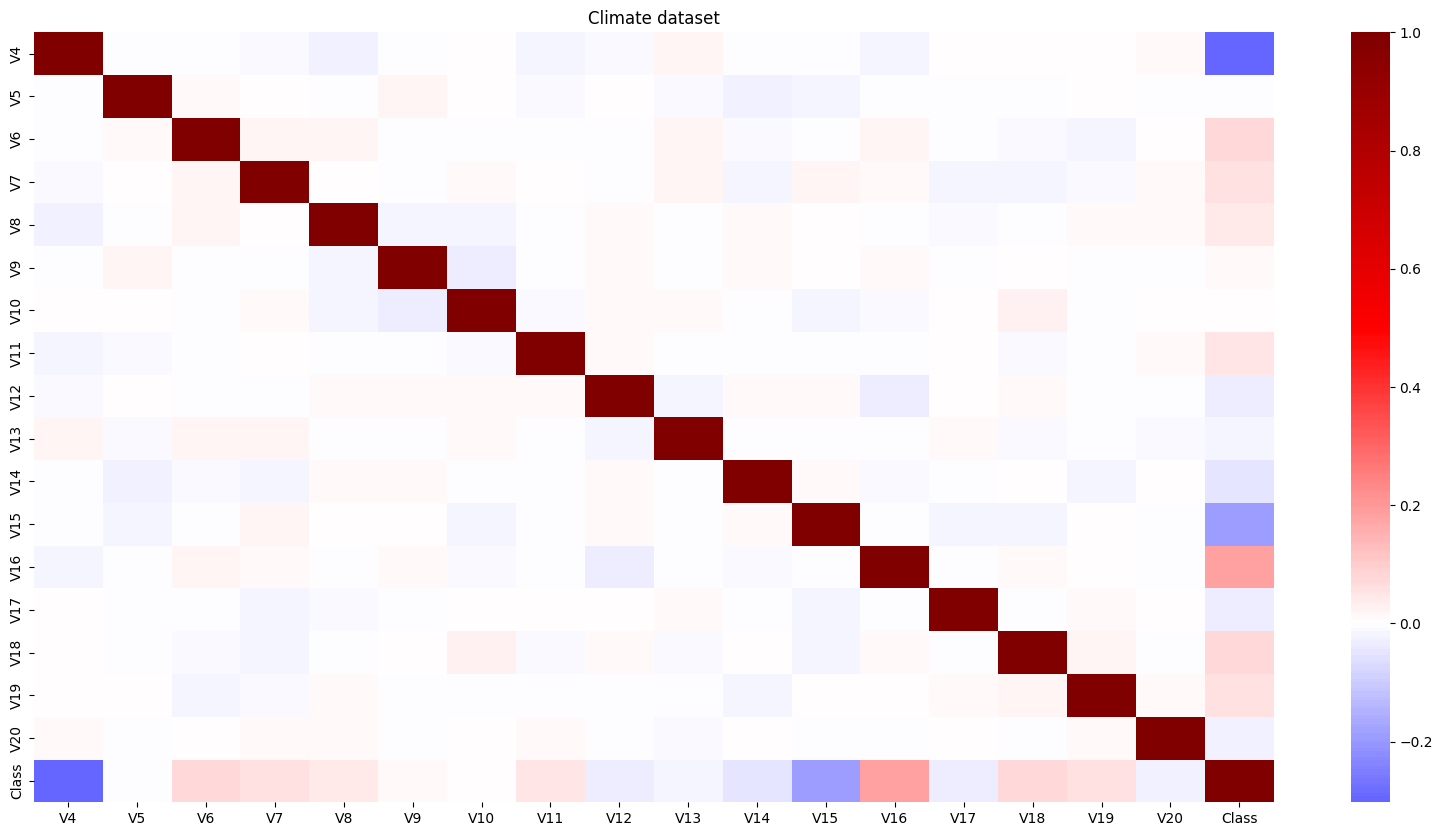

In [27]:
print("Number of null values:")
print(climate_df.isnull().sum().sum()) 

missing_percentage = (climate_df.isnull().sum() / len(climate_df)) * 100
print("Percentage of missing values per variable:")
print(missing_percentage)

correlated_columns = check_correlation(climate_df)

for col, correlated_cols in correlated_columns:
    print(f"Column {col} is strongly correlated with columns: {', '.join(map(str, correlated_cols))}")
            
plot_dataset(climate_df, title="Climate dataset")

V3 and V4 are strongly correlated, so we will drop one of these columns in `data_readers.py` file

### 4. qsar-biodeg - https://www.openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfClasses=%3D_2&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfInstances=between_1000_10000&id=1494

In [39]:
data = arff.loadarff("data/biodegradable/phpGUrE90.arff")
biodeg_df = pd.DataFrame(data[0])
biodeg_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
0,3.919,2.6909,0.0,0.0,0.0,0.0,0.0,31.4,2.0,0.0,...,0.0,0.0,0.0,2.949,1.591,0.0,7.253,0.0,0.0,b'2'
1,4.170,2.1144,0.0,0.0,0.0,0.0,0.0,30.8,1.0,1.0,...,0.0,0.0,0.0,3.315,1.967,0.0,7.257,0.0,0.0,b'2'
2,3.932,3.2512,0.0,0.0,0.0,0.0,0.0,26.7,2.0,4.0,...,0.0,0.0,1.0,3.076,2.417,0.0,7.601,0.0,0.0,b'2'
3,3.000,2.7098,0.0,0.0,0.0,0.0,0.0,20.0,0.0,2.0,...,0.0,0.0,1.0,3.046,5.000,0.0,6.690,0.0,0.0,b'2'
4,4.236,3.3944,0.0,0.0,0.0,0.0,0.0,29.4,2.0,4.0,...,0.0,0.0,0.0,3.351,2.405,0.0,8.003,0.0,0.0,b'2'


In [40]:
biodeg_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,...,0.129858,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,...,0.644057,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,...,0.000000,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,...,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000


In [41]:
biodeg_df.replace({'Class': {b'2': 0, b'1': 1}}, inplace=True)
biodeg_df['Class'] = biodeg_df['Class'].astype('float64')

Number of null values:
0
Percentage of missing values per variable:
V1       0.0
V2       0.0
V3       0.0
V4       0.0
V5       0.0
V6       0.0
V7       0.0
V8       0.0
V9       0.0
V10      0.0
V11      0.0
V12      0.0
V13      0.0
V14      0.0
V15      0.0
V16      0.0
V17      0.0
V18      0.0
V19      0.0
V20      0.0
V21      0.0
V22      0.0
V23      0.0
V24      0.0
V25      0.0
V26      0.0
V27      0.0
V28      0.0
V29      0.0
V30      0.0
V31      0.0
V32      0.0
V33      0.0
V34      0.0
V35      0.0
V36      0.0
V37      0.0
V38      0.0
V39      0.0
V40      0.0
V41      0.0
Class    0.0
dtype: float64
Column V1 is strongly correlated with columns: V15, V27
Column V5 is strongly correlated with columns: V11
Column V7 is strongly correlated with columns: V33
Column V10 is strongly correlated with columns: V16
Column V11 is strongly correlated with columns: V5, V34, V38
Column V13 is strongly correlated with columns: V15, V39
Column V15 is strongly correlated with colu

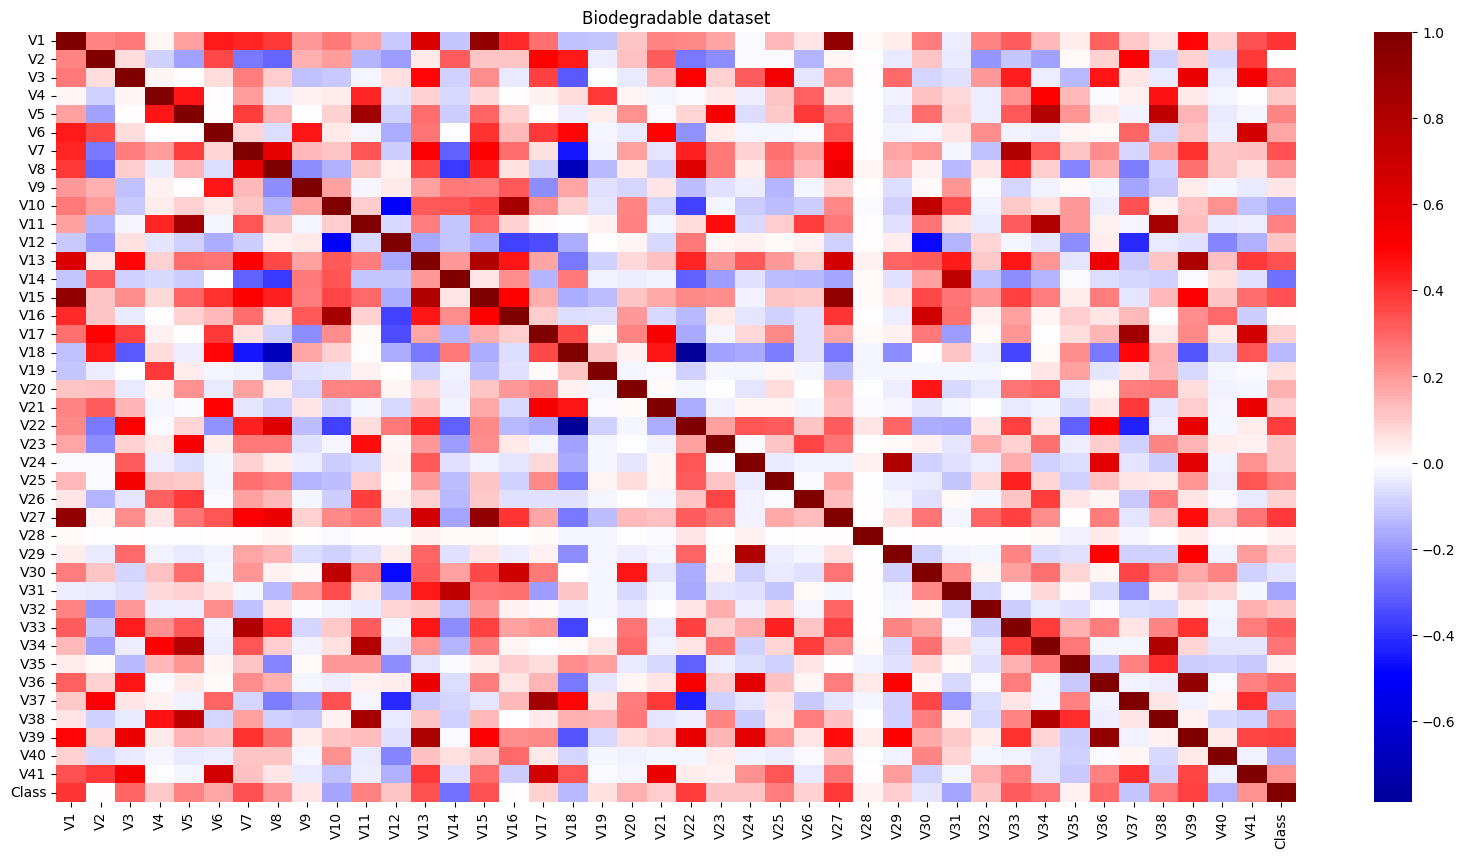

In [42]:
print("Number of null values:")
print(biodeg_df.isnull().sum().sum()) 

missing_percentage = (biodeg_df.isnull().sum() / len(biodeg_df)) * 100
print("Percentage of missing values per variable:")
print(missing_percentage)

correlated_columns = check_correlation(biodeg_df)

for col, correlated_cols in correlated_columns:
    print(f"Column {col} is strongly correlated with columns: {', '.join(map(str, correlated_cols))}")
            
plot_dataset(biodeg_df, title="Biodegradable dataset")

Lots of columns are strongly correlated, so they will be dropped in `data_readers.py` file

### 5. Plates - https://www.openml.org/search?type=data&sort=nr_of_downloads&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&order=desc&qualities.NumberOfInstances=between_1000_10000&id=1504

In [71]:
data = arff.loadarff("./data/plates/php9xWOpn.arff")
plates_df = pd.DataFrame(data[0])
plates_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,...,0.8182,-0.2913,0.5822,1.0,0.0,0.0,0.0,0.0,0.0,b'1'
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,0.7931,-0.1756,0.2984,1.0,0.0,0.0,0.0,0.0,0.0,b'1'
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,0.6667,-0.1228,0.2150,1.0,0.0,0.0,0.0,0.0,0.0,b'1'
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,0.8444,-0.1568,0.5212,1.0,0.0,0.0,0.0,0.0,0.0,b'1'
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,...,0.9338,-0.1992,1.0000,1.0,0.0,0.0,0.0,0.0,0.0,b'1'


In [72]:
plates_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,1.403271,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.454345,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,1.079200,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,1.322200,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,1.732400,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
plates_df.replace({"Class": {b"0": 0, b"1": 1}}, inplace=True)

plates_df['Class'] = plates_df['Class'].astype('float64')

Number of null values:
0
Percentage of missing values per variable:
V1       0.0
V2       0.0
V3       0.0
V4       0.0
V5       0.0
V6       0.0
V7       0.0
V8       0.0
V9       0.0
V10      0.0
V11      0.0
V12      0.0
V13      0.0
V14      0.0
V15      0.0
V16      0.0
V17      0.0
V18      0.0
V19      0.0
V20      0.0
V21      0.0
V22      0.0
V23      0.0
V24      0.0
V25      0.0
V26      0.0
V27      0.0
V28      0.0
V29      0.0
V30      0.0
V31      0.0
V32      0.0
V33      0.0
Class    0.0
dtype: float64
Column V1 is strongly correlated with columns: V2
Column V2 is strongly correlated with columns: V1
Column V3 is strongly correlated with columns: V4
Column V4 is strongly correlated with columns: V3
Column V5 is strongly correlated with columns: V6, V7, V8
Column V6 is strongly correlated with columns: V5, V7, V8
Column V7 is strongly correlated with columns: V5, V6
Column V8 is strongly correlated with columns: V5, V6
Column V10 is strongly correlated with columns: V26

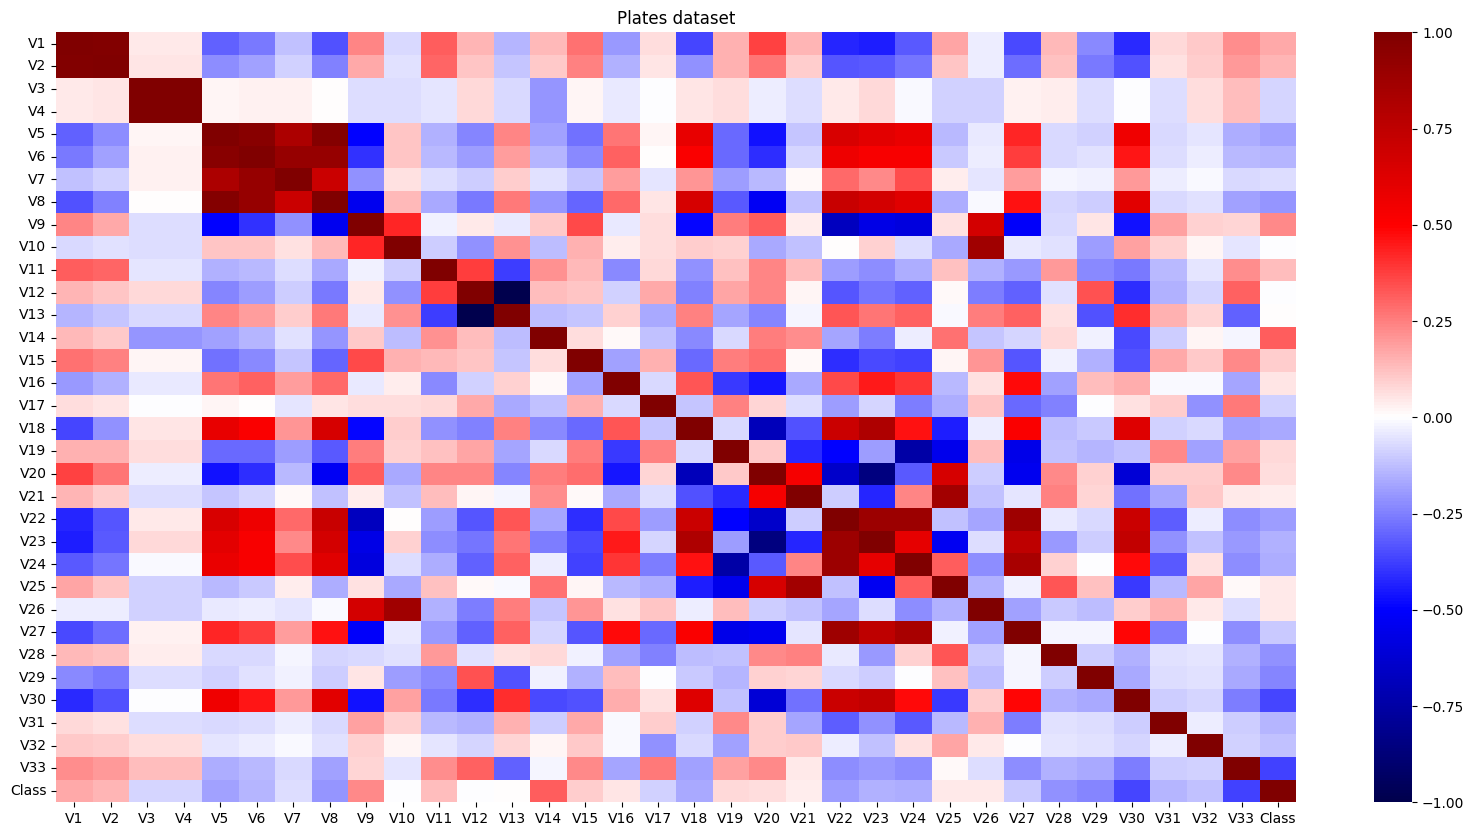

In [74]:
print("Number of null values:")
print(plates_df.isnull().sum().sum()) 

missing_percentage = (plates_df.isnull().sum() / len(plates_df)) * 100
print("Percentage of missing values per variable:")
print(missing_percentage)

correlated_columns = check_correlation(plates_df)
col_names = []

for col, correlated_cols in correlated_columns:
    print(f"Column {col} is strongly correlated with columns: {', '.join(map(str, correlated_cols))}")
    col_names.append(col)
            
plot_dataset(plates_df, title="Plates dataset")

### 6. Japanese Vowels Dataset - https://www.openml.org/search?type=data&sort=version&status=any&order=asc&exact_name=JapaneseVowels&id=976

In [77]:
data = arff.loadarff('./data/JapaneseVowels/kdd_JapaneseVowels.arff')
vowels_df = pd.DataFrame(data[0])
vowels_df.head()

,utterance,frame,coefficient1,coefficient2,coefficient3,coefficient4,coefficient5,coefficient6,coefficient7,coefficient8,coefficient9,coefficient10,coefficient11,coefficient12,binaryClass
0,1.0,1.0,1.860936,-0.207383,0.261557,-0.214562,-0.171253,-0.118167,-0.277557,0.025668,0.126701,-0.306756,-0.213076,0.088728,b'N'
1,1.0,2.0,1.891651,-0.193249,0.235363,-0.249118,-0.112890,-0.112238,-0.311997,-0.027122,0.171457,-0.289431,-0.247722,0.093011,b'N'
2,1.0,3.0,1.939205,-0.239664,0.258561,-0.291458,-0.041053,-0.102034,-0.383300,0.019013,0.169510,-0.314894,-0.227908,0.074638,b'N'
3,1.0,4.0,1.717517,-0.218572,0.217119,-0.228186,-0.018608,-0.137624,-0.403318,-0.009643,0.164607,-0.323267,-0.210105,0.098098,b'N'
4,1.0,5.0,1.741191,-0.279891,0.196583,-0.236377,-0.032012,-0.090612,-0.363134,-0.012571,0.124298,-0.351171,-0.216545,0.113899,b'N'


In [78]:
vowels_df.describe()

,utterance,frame,coefficient1,coefficient2,coefficient3,coefficient4,coefficient5,coefficient6,coefficient7,coefficient8,coefficient9,coefficient10,coefficient11,coefficient12
count,9961.000000,9961.000000,9961.000000,9961.000000,9961.000000,9961.000000,9961.000000,9961.000000,9961.000000,9961.000000,9961.000000,9961.000000,9961.000000,9961.000000
mean,20.364321,8.703142,0.803850,-0.528716,0.229961,-0.288775,0.225832,-0.230111,-0.163762,-0.046302,-0.208592,-0.180667,-0.024101,0.089731
std,15.878836,5.197458,0.496633,0.384718,0.294560,0.306976,0.262541,0.181120,0.159918,0.191771,0.180634,0.115874,0.097999,0.128687
min,1.000000,1.000000,-0.783783,-1.852765,-0.764345,-0.977701,-0.691587,-0.895842,-0.618975,-0.575827,-0.623201,-0.503843,-0.426728,-0.336968
25%,9.000000,4.000000,0.400302,-0.804196,0.025671,-0.532593,0.054715,-0.355243,-0.277641,-0.190651,-0.344344,-0.262668,-0.086901,0.009797
50%,18.000000,8.000000,0.825928,-0.546407,0.240607,-0.285917,0.241062,-0.219219,-0.168598,-0.060376,-0.218547,-0.181632,-0.017878,0.100098
75%,27.000000,12.000000,1.198193,-0.259262,0.444745,-0.058193,0.421738,-0.096698,-0.052767,0.089830,-0.087794,-0.101195,0.045390,0.179981
max,88.000000,29.000000,2.203141,0.655478,1.328993,0.646172,0.914657,0.335503,0.424110,0.522330,0.393086,0.277830,0.289177,0.425088


In [79]:
vowels_df.replace({'binaryClass': {b'P': 1, b'N': 1}}, inplace=True)


Number of null values:
0
Percentage of missing values per variable:
utterance        0.0
frame            0.0
coefficient1     0.0
coefficient2     0.0
coefficient3     0.0
coefficient4     0.0
coefficient5     0.0
coefficient6     0.0
coefficient7     0.0
coefficient8     0.0
coefficient9     0.0
coefficient10    0.0
coefficient11    0.0
coefficient12    0.0
binaryClass      0.0
dtype: float64


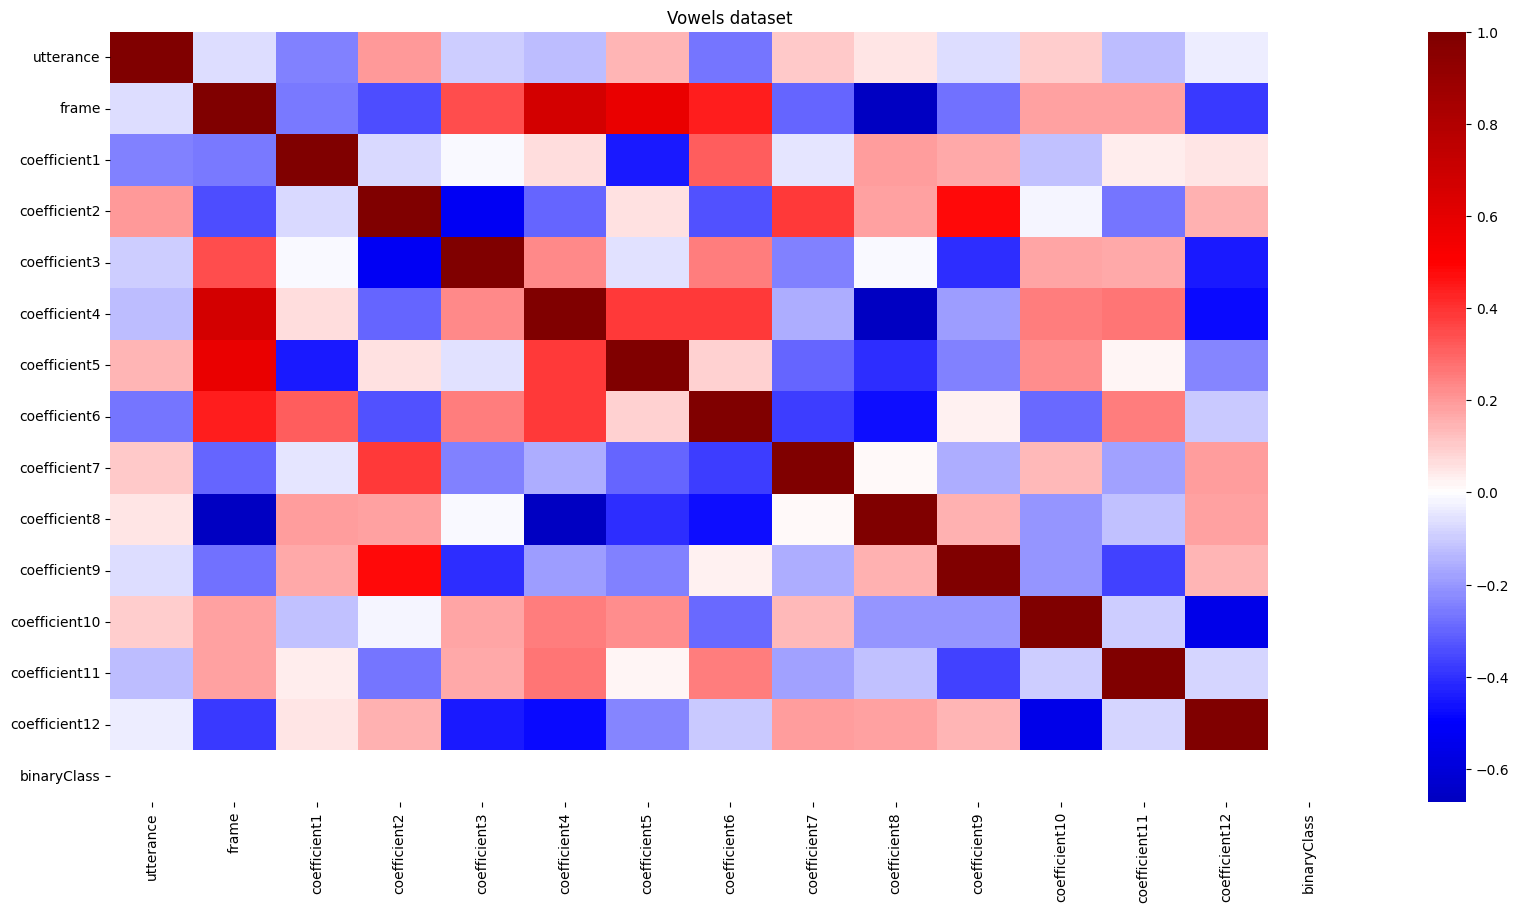

In [80]:
print("Number of null values:")
print(vowels_df.isnull().sum().sum()) 

missing_percentage = (vowels_df.isnull().sum() / len(vowels_df)) * 100
print("Percentage of missing values per variable:")
print(missing_percentage)

correlated_columns = check_correlation(vowels_df)
col_names = []

for col, correlated_cols in correlated_columns:
    print(f"Column {col} is strongly correlated with columns: {', '.join(map(str, correlated_cols))}")
    col_names.append(col)
            
plot_dataset(vowels_df, title="Vowels dataset")

## Small Datasets

### 7. Diabetes  - https://www.openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfClasses=%3D_2&qualities.NumberOfFeatures=lte_10&id=37

In [6]:
data = arff.loadarff("./data/diabetes/dataset_37_diabetes.arff")
diabetes_df = pd.DataFrame(data[0])
diabetes_df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'


In [8]:
diabetes_df.replace({'class': {b'tested_positive': 1, b'tested_negative': 0}}, inplace=True)
diabetes_df['class'] = diabetes_df['class'].astype('float64')

Number of null values:
0
Percentage of missing values per variable:
preg     0.0
plas     0.0
pres     0.0
skin     0.0
insu     0.0
mass     0.0
pedi     0.0
age      0.0
class    0.0
dtype: float64


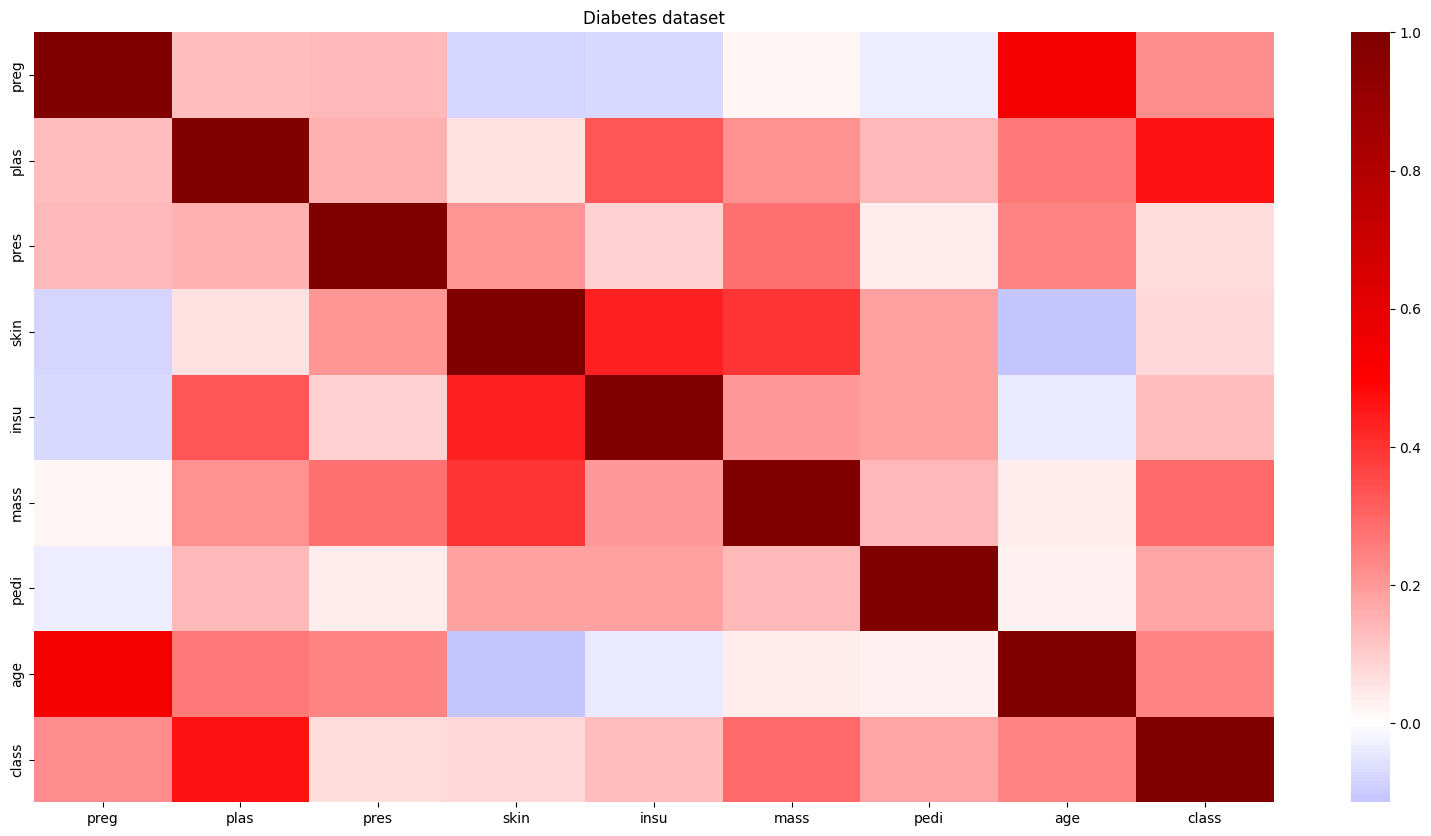

In [9]:
print("Number of null values:")
print(diabetes_df.isnull().sum().sum()) 

missing_percentage = (diabetes_df.isnull().sum() / len(diabetes_df)) * 100
print("Percentage of missing values per variable:")
print(missing_percentage)

correlated_columns = check_correlation(diabetes_df)

for col, correlated_cols in correlated_columns:
    print(f"Column {col} is strongly correlated with columns: {', '.join(map(str, correlated_cols))}")
            
plot_dataset(diabetes_df, title="Diabetes dataset")

### 8. Water Quality -  https://www.kaggle.com/datasets/adityakadiwal/water-potability

There are no null values in the dataset. Columns 12 and 14 are strongly correlated. Column 14 will be deleted, as it also has high correlation with column 20.

In [7]:
water_data = pd.read_csv("data/WaterQuality/water_potability.csv")
water_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Number of null values:
1434
Percentage of missing values per variable:
ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


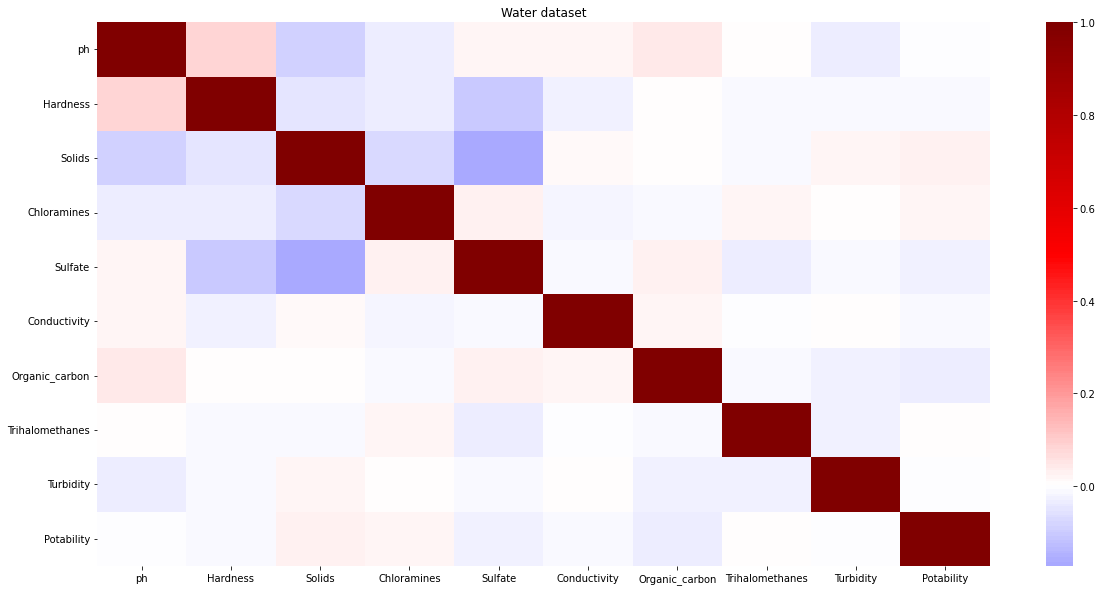

In [8]:
print("Number of null values:")
print(water_data.isnull().sum().sum()) 

missing_percentage = (water_data.isnull().sum() / len(water_data)) * 100
print("Percentage of missing values per variable:")
print(missing_percentage)

correlated_columns = check_correlation(water_data)

for col, correlated_cols in correlated_columns:
    print(f"Column {col} is strongly correlated with columns: {', '.join(map(str, correlated_cols))}")
            
plot_dataset(water_data, title="Water dataset")

Two variables have more than 10% of missing values, so all missing values will be filled with mean value. There are no colinear variables in the dataset.

In [9]:
water_data = water_data.fillna(water_data.mean())

### 9. Banana Quality Dataset - https://www.kaggle.com/datasets/l3llff/banana?rvi=1

In [9]:
banana_data = pd.read_csv("data/banana_quality/banana_quality.csv")
banana_data.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


In [13]:
banana_data.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [17]:
banana_data.replace({'Quality': {'Good': 1, 'Bad': 0}}, inplace=True)

Number of null values:
0
Percentage of missing values per variable:
Size           0.0
Weight         0.0
Sweetness      0.0
Softness       0.0
HarvestTime    0.0
Ripeness       0.0
Acidity        0.0
Quality        0.0
dtype: float64


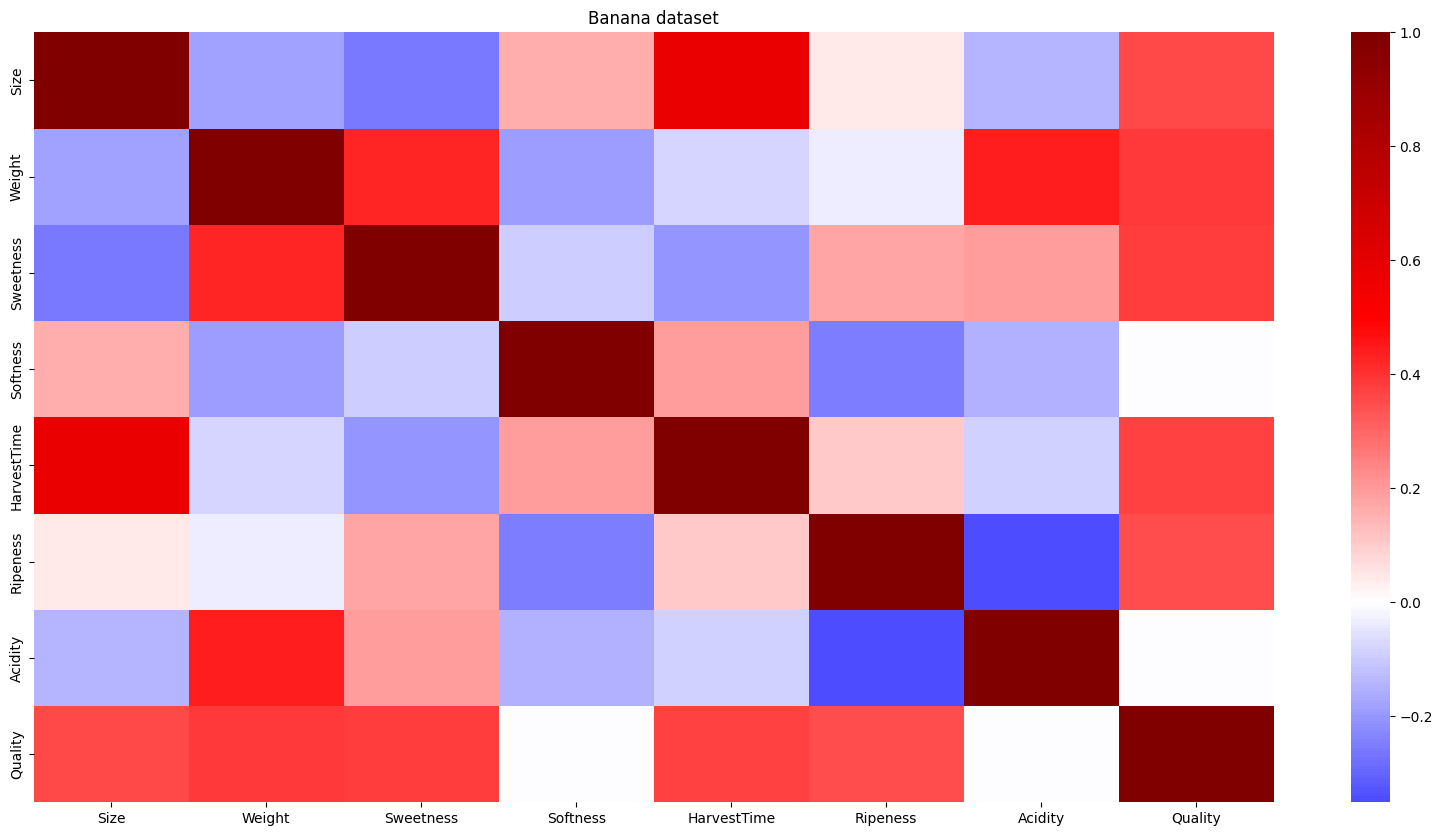

In [18]:
print("Number of null values:")
print(banana_data.isnull().sum().sum()) 

missing_percentage = (banana_data.isnull().sum() / len(banana_data)) * 100
print("Percentage of missing values per variable:")
print(missing_percentage)

correlated_columns = check_correlation(banana_data)

for col, correlated_cols in correlated_columns:
    print(f"Column {col} is strongly correlated with columns: {', '.join(map(str, correlated_cols))}")
            
plot_dataset(banana_data, title="Banana dataset")

Saving all cleaned datasets

In [12]:
ionosphere_data.to_csv("data/ionosphere/ionsphere_clean.data", index=False, header=False)
water_data.to_csv("data/WaterQuality/water_potability_clean.csv")